# Testing the Effects of Blending

We saw in [demo 1](demo-1.ipynb) that the measured pdf over the galaxy models (gpdf hereafter) looked pretty unphysical. One of the proposed causes of this was blending between sources. To test the impact of blending on the gpdf we can compare to the gpdf generated from images with a reduced source count and hence reduced incidence of blending. Before we begin though, we need to increase our control sample -- 1 image with ~1000 sources is not enough.

In [1]:
import numpy as np
import os

# these define the spacing and limits of the original galaxy model grid
minr = 0.1 # min
maxr = 25 # max
nr = 21 # and number of radius steps
minn = 0.5 # min
maxn = 5 # max
nn = 20 # and number of sersic index steps

### Increasing the original sample size

We ran 1065 instances of the image generation, galaxy model fitting and gpdf generation script as seen in [demo 1](demo-1.ipynb) and stored the generated galaxy model pdf for each. This corresponds to >1E6 sources fitted, which should be plenty to be confident of the results.

In [2]:
_dir1 = 'gpdf_orig/' # the output of the runs are stored in here
files1 = os.listdir(_dir1)
data1 = np.array([np.genfromtxt(_dir1+f) for f in files1])

Now combine them.

In [3]:
gpdf_orig = np.sum(data1, axis=0)
gpdf_orig = (gpdf_orig/np.sum(gpdf_orig)).reshape(nr,nn)

And display the result.

Text(0, 0.5, 'n')

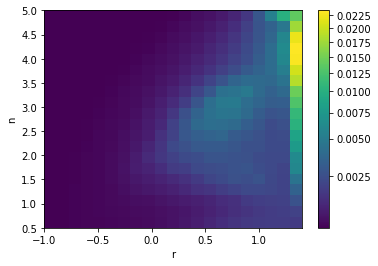

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

plt.figure()
plt.imshow(gpdf_orig.T, origin='lower', 
           extent=[np.log10(minr),np.log10(maxr),minn,maxn], 
           aspect=0.45, norm=PowerNorm(gamma=0.5))
plt.colorbar()
plt.xlabel("r")
plt.ylabel("n")

As we can see, the general trend resembles that of [demo 1](demo-1.ipynb) but it is much cleaner (note the different colour scaling).

### Reduced source density

We then ran the same experiment but reduced the number of sources per axis from 40 to 10 corresponding to a reduction in source density by a factor of 16. This time we generated and processed more images - 5352 - to make up for the lower source density. This corresponds to about 500k sources, fewer than before but still plenty enough to be confident of the results.

Text(0, 0.5, 'n')

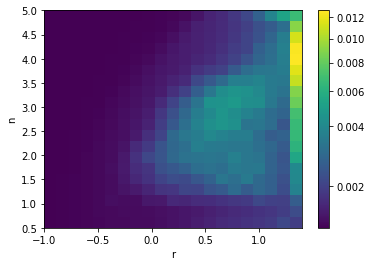

In [5]:
# load the results of the runs
_dir2 = 'gpdf_rsd/' # the output of these runs are stored in here
files2 = os.listdir(_dir2)
data2 = np.array([np.genfromtxt(_dir2+f) for f in files2])

# and combine them
gpdf_rsd = np.sum(data2, axis=0)
gpdf_rsd = (gpdf_rsd/np.sum(gpdf_rsd)).reshape(nr,nn)

# and display the result
plt.figure()
plt.imshow(gpdf_rsd.T, origin='lower', 
           extent=[np.log10(minr),np.log10(maxr),minn,maxn], 
           aspect=0.45, norm=PowerNorm(gamma=0.5))
plt.colorbar()
plt.xlabel("r")
plt.ylabel("n")

The distribution away from the edge is broadly the same shape, but the proportion of sources at log(r)~1.5 is smaller than before (the peak is half the size). This suggest blending is probably affecting the resulting distribution in some way, but that it's not the only cause.